In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from kid_readout.utils import readoutnc

In [3]:
import glob

In [6]:
fns = glob.glob('/artemis/readout/2016-02-19_*_scan_lo_*_MHz*.nc')

In [7]:
fns

['/artemis/readout/2016-02-19_103911_scan_lo_1010.0_MHz_mmw_on.nc',
 '/artemis/readout/2016-02-19_104922_scan_lo_1200.0_MHz_mmw_on.nc',
 '/artemis/readout/2016-02-19_105933_scan_lo_1390.0_MHz_mmw_on.nc',
 '/artemis/readout/2016-02-19_110951_scan_lo_1580.0_MHz_mmw_on.nc',
 '/artemis/readout/2016-02-19_111956_scan_lo_1770.0_MHz_mmw_on.nc',
 '/artemis/readout/2016-02-19_112955_scan_lo_1960.0_MHz_mmw_on.nc']

In [8]:
rncs = [readoutnc.ReadoutNetCDF(fn) for fn in fns]

/artemis/readout/2016-02-19_103911_scan_lo_1010.0_MHz_mmw_on.nc
/artemis/readout/2016-02-19_104922_scan_lo_1200.0_MHz_mmw_on.nc
/artemis/readout/2016-02-19_105933_scan_lo_1390.0_MHz_mmw_on.nc
/artemis/readout/2016-02-19_110951_scan_lo_1580.0_MHz_mmw_on.nc
/artemis/readout/2016-02-19_111956_scan_lo_1770.0_MHz_mmw_on.nc
/artemis/readout/2016-02-19_112955_scan_lo_1960.0_MHz_mmw_on.nc


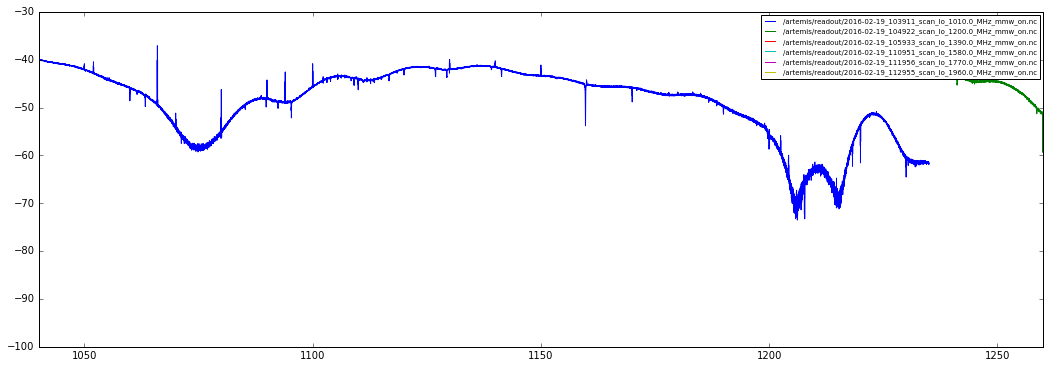

In [13]:
figure(figsize=(18,6))
for rnc in rncs:
    if rnc.sweeps:
        print rnc.filename
        fr = rnc.sweeps[0].frequency[:]
        s21 = rnc.sweeps[0].s21[:]
        plot(fr,20*np.log10(np.abs(s21)),label=rnc.filename)
xlim(1040,1260)
legend(prop=dict(size='x-small'))

In [11]:
res_group_1 = np.array([1038.9,
                        1060.0, # may be double
                        1061.6,
                        1063.4,
                        1089.85,
                        1092.43,
                        1095.35, # may be double
                        #several possible resonances 1102-1108
                        1109.09, # may be double
                        1116.75,
                        1126.95,
                        1129.41,
                        1139.16,
                        1141.4,
                        1159.75,
                        1199.65,
                        1241.175,
#                        1240.3,  # these three were originally included but seem to be phantoms
#                        1258.6,
#                        1270.6
                       ])
res_group_2 = np.array([1434.54, #double
                        1455.35,
                        1460.8, #low Q
                        1482.4,
                        1484.4,
                        #1485.7,
                        1489.4, #this one is also fake to avoid conflict between 1484.4 and 1485.7
                        1496.6, # double
                        1499.17, # double
                        #1515.96,#high Q non responsive resonance at 1515.96
                        1519.34, # double
                        #1520.2, # double
                        1524.2, # this one is fake, but kept getting collisions between 1519.3 and 1520.2
                        1527.45, # weak
                        1531.6, # double?
                        1554.97,
                        1568.71,
                        1595.87,
                        1610.0,
                        
                       ])

In [12]:
res_group_1.shape

(16,)

In [13]:
res_group_2.shape

(16,)

In [14]:
np.save('/artemis/readout/resonances/2016-02-29-jpl-park-2015-10-40nm-al-niobium-gp-two-groups.npy',
       np.hstack((res_group_1,res_group_2)))

In [56]:
1500/1389.

1.079913606911447

In [49]:
res_group_2.ptp()

175.46000000000004

In [14]:
f0 = (1783+1406)/2.

In [15]:
f0+255, f0-256

(1849.5, 1338.5)

In [14]:
rnc = rncs[0]

In [15]:
swg = rnc.sweeps[0]

In [20]:
d = swg.timestream_group.data[:]

In [21]:
d.shape

(32768, 8192)

In [22]:
d = d.reshape((32768,-1,256)).mean(1)

In [23]:
resp = np.abs(d[:,32:96].mean(1)-d[:,140:240].mean(1))

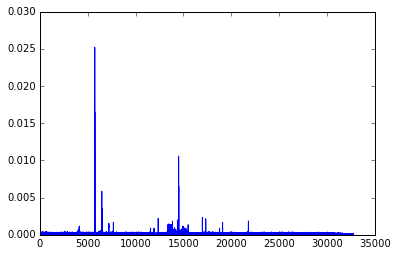

In [26]:
plot(resp)

In [27]:
resps = []
for rnc in rncs:
    swg = rnc.sweeps[0]
    d = swg.timestream_group.data[:]
    d = d.reshape((32768,-1,256)).mean(1)
    resp = np.abs(d[:,32:96].mean(1)-d[:,140:240].mean(1))
    resps.append(resp)
resp = np.hstack(resps)
del resps

In [30]:
rfr = np.hstack([rnc.sweeps[0].frequency[:] for rnc in rncs])

In [33]:
rs21 = np.hstack([rnc.sweeps[0].s21[:] for rnc in rncs])

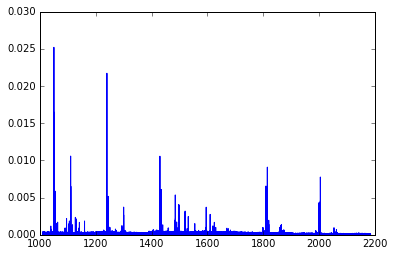

In [31]:
plot(rfr,resp)

In [34]:
np.savez('/artemis/readout/archive/2016-02-19-jpl-park-2015-10-optical-response-scan.npz',
        frequency=rfr,response=resp,s21 = rs21)